In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [ ]:
df = pd.read_csv("Laptop_review.csv")
df.head()

,id,Sentence,Aspect Term,polarity,from,to
0,2339,I charge it at night and skip taking the cord ...,cord,neutral,41,45
1,2339,I charge it at night and skip taking the cord ...,battery life,positive,74,86
2,1316,The tech guy then said the service center does...,service center,negative,27,41
3,1316,The tech guy then said the service center does...,"""sales"" team",negative,109,121
4,1316,The tech guy then said the service center does...,tech guy,neutral,4,12


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Presebaran Data')

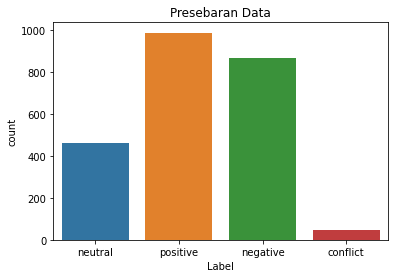

In [ ]:
# persebaran data
sns.countplot(df.polarity)
plt.xlabel('Label')
plt.title('Presebaran Data')

## Check and remove data null

In [ ]:
df.isnull().sum()

id             0
Sentence       0
Aspect Term    0
polarity       0
from           0
to             0
dtype: int64

tidak ada data yang bernilai null

# Sentiment Classification with CNN

In [ ]:
import numpy as np
import re
import pandas as pd 
from sklearn import model_selection

def clean_str(string):
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().lower()


def load_data_and_labels(file):
    # Load data from file
    dtf = pd.read_csv(file, index_col = 0)[['Sentence', 'Aspect Term', 'polarity']]
    dtf = dtf.loc[(dtf["polarity"] != "conflict")]
    # Split by words
    x_text = dtf['Sentence']
    x_text = [clean_str(sent) for sent in x_text]
    # Generate labels
    y_labels = dtf['polarity']
    y = []
    for i in y_labels:
      if(i == "negative"):
        y.append(0)
      elif(i == "neutral"):
        y.append(1)
      else : #positive
        y.append(2)
      
    # Aspect category
    aspect = [aspect for aspect in dtf['Aspect Term']]
    return [x_text, y, aspect]

In [ ]:
x_data, y_data, aspect = load_data_and_labels('drive/MyDrive/NLP/Laptop_review.csv')

In [ ]:
x_data

['i charge it at night and skip taking the cord with me because of the good battery life',
 'i charge it at night and skip taking the cord with me because of the good battery life',
 'the tech guy then said the service center does not do 1 to 1 exchange and i have to direct my concern to the sales team , which is the retail shop which i bought my netbook from',
 'the tech guy then said the service center does not do 1 to 1 exchange and i have to direct my concern to the sales team , which is the retail shop which i bought my netbook from',
 'the tech guy then said the service center does not do 1 to 1 exchange and i have to direct my concern to the sales team , which is the retail shop which i bought my netbook from',
 'it is of high quality , has a killer gui , is extremely stable , is highly expandable , is bundled with lots of very good applications , is easy to use , and is absolutely gorgeous',
 'it is of high quality , has a killer gui , is extremely stable , is highly expandable

In [ ]:
length = len(max(x_data, key=len))
length

467

In [ ]:
aspect

['cord',
 'battery life',
 'service center',
 '"sales" team',
 'tech guy',
 'quality',
 'GUI',
 'applications',
 'use',
 'start up',
 'features',
 'iChat',
 'Photobooth',
 'garage band',
 'features',
 'GUI',
 'screen',
 'power light',
 'hard drive light',
 'battery',
 'rubber enclosure',
 'edge',
 'multi-touch gestures',
 'tracking area',
 'external mouse',
 'gaming',
 'suite of software',
 'speed',
 'Windows 7',
 'usb devices',
 'software',
 'system',
 'Microsoft office for the mac',
 'syncing',
 '30" HD Monitor',
 'screen',
 'boot up',
 'service',
 'operating system',
 'preloaded software',
 'price',
 'features',
 'clock in BIOS setup',
 'WARRANTY SERVICE',
 'brand',
 'warranty',
 'features',
 'fan',
 'Customer Service number',
 'warranty',
 'talking to a technician',
 'hard disc',
 'windows',
 'drivers',
 'Drivers',
 'BIOS update',
 'system',
 'HP Technical Support',
 'browser',
 'keyboard',
 'virus scan',
 '9 punds',
 'program',
 'warrenty',
 'Toshiba Warranty',
 'Quality',
 'webca

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import pickle


# Tokenizing all our words
tokenizer = Tokenizer(lower=True, split=' ', 
                     oov_token="NaN", 
                     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(x_data)
sequences = tokenizer.texts_to_sequences(x_data)
aspect_sequences = tokenizer.texts_to_sequences(aspect)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

pickle.dump(tokenizer, open('KerasTokenizer.pickle', 'wb'))


# Pad our review sentence and corresponding aspect
data = pad_sequences(sequences, maxlen=length, padding="post", truncating="post")
for i in range(0, len(data)):
    aspect_sequences[i] = aspect_sequences[i] * np.count_nonzero(data[i])
aspect_data = pad_sequences(aspect_sequences, maxlen=length, padding="post", truncating="post")

# Split training data
labels = np.asarray(y_data)
X_train, X_test, aspect_train, aspect_test, y_train, y_test = model_selection.train_test_split(data, aspect_data, labels, test_size = 0.1, shuffle=False)

print(X_train)
print(len(X_train))
print(X_train.shape)

print(aspect_train)
print(len(aspect_train))
print(y_train)

Found 3083 unique tokens.
[[   5  163    6 ...    0    0    0]
 [   5  163    6 ...    0    0    0]
 [   2  291 1146 ...    0    0    0]
 ...
 [   5   54   30 ...    0    0    0]
 [   5   19   30 ...    0    0    0]
 [ 850  158    2 ...    0    0    0]]
2081
(2081, 467)
[[ 640  640  640 ...    0    0    0]
 [  35   52   35 ...    0    0    0]
 [ 114  335  114 ...    0    0    0]
 ...
 [  92 1385   92 ...    0    0    0]
 [ 367  367  367 ...    0    0    0]
 [  47   47   47 ...    0    0    0]]
2081
[1 2 0 ... 0 0 0]


In [ ]:
print(aspect_test.shape)
print(X_test.shape)

(232, 467)
(232, 467)


In [ ]:
import gensim
import gensim.downloader as api
from gensim.models import KeyedVectors

filename = 'drive/MyDrive/NLP/n/GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [ ]:
embedding_matrix = np.zeros((len(word_index) + 2, 300))
for word, i in word_index.items():
    try:
        embedding_vector = model.get_vector(word)
    except KeyError:
        continue
    else:
        embedding_matrix[i] = embedding_vector

In [ ]:
from pickle import load
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras import layers
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.layers import concatenate
import tensorflow as tf

# define the model
def define_model(length, vocab_size):
    filter_sizes = [3, 4, 5]
    num_filters = 128
    hidden_dims = 30
    dropout_prob = 0.5
    # channel 1
    inputs1 = Input(shape=(length,))
    embedding1 = Embedding(embedding_matrix.shape[0],
                embedding_matrix.shape[1],
                input_length=length,
                weights=[embedding_matrix],
                trainable=False)(inputs1)
    # channel 2
    inputs2 = Input(shape=(length,))
    embedding2 = Embedding(embedding_matrix.shape[0],
                embedding_matrix.shape[1],
                input_length=length,
                weights = [embedding_matrix],
                trainable=False)(inputs2)
    # merge
    merged = layers.Concatenate(axis = 2)([embedding1, embedding2])
    # Convolutional block
    conv_blocks = []
    for sz in filter_sizes:
        conv = layers.Convolution1D(filters=num_filters,
                             kernel_size=sz,
                             padding="valid",
                             activation="relu",
                             strides=1)(merged)
        conv = layers.MaxPooling1D(pool_size=2)(conv)
        conv = layers.Flatten()(conv)
        conv_blocks.append(conv)
    z = layers.Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
    z = layers.Dropout(dropout_prob)(z)
    z = layers.Dense(hidden_dims, activation="relu")(z)
    outputs = layers.Dense(3, activation="softmax")(z)
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    # compile
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize
    print(model.summary())
    plot_model(model, show_shapes=True, to_file='multichannel.png')
    return model

vocab_size = len(word_index)
# define model
model = define_model(length, vocab_size)
# fit model
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)
model.fit([X_train, aspect_train], array(y_train), epochs=20, batch_size=20, validation_data=([X_test, aspect_test], array(y_test)))
# save the model
model.save('drive/MyDrive/NLP/model_cnn.h5')
model.save('model_cnn.h5')

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 467)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 467)]        0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 467, 300)     925500      ['input_3[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, 467, 300)     925500      ['input_4[0][0]']                
                                                                                            

In [ ]:
from keras.models import load_model

# load the model
model = load_model('drive/MyDrive/NLP/model_cnn.h5')

# evaluate model on training dataset
loss, acc = model.evaluate([X_train, aspect_train], array(y_train), verbose=0)
print('Train Accuracy: %f' % (acc*100))


Train Accuracy: 98.990870


In [ ]:
# evaluate model on test dataset dataset
model = load_model('drive/MyDrive/NLP/model_cnn.h5')
loss, acc = model.evaluate([X_test, aspect_test], array(y_test), verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 61.637932


In [ ]:
test_data = ["The graphics are stunning"]
test_data = [clean_str(text) for text in test_data]
test_aspect = [clean_str("graphics")]

sequences_test_data = tokenizer.texts_to_sequences(test_data)
sequences_test_aspect = tokenizer.texts_to_sequences(test_aspect)
for i in range(0, len(sequences_test_data)):
    sequences_test_aspect[i] = sequences_test_aspect[i] * np.count_nonzero(sequences_test_data[i])

sequences_test_data = pad_sequences(sequences_test_data, maxlen=length, padding="post", truncating="post")
sequences_test_aspect = pad_sequences(sequences_test_aspect, maxlen=length, padding="post", truncating="post")


test_data_np = np.asarray(sequences_test_data)
test_aspect_np = np.asarray(sequences_test_aspect)
result = model.predict([test_data_np, test_aspect_np])
print(result)

1/1 [==============================] - 0s 38ms/step
[[1.1557451e-01 2.7973125e-05 8.8439757e-01]]


# Sentiment Classification with Constituency Parsing

In [ ]:
!pip install pandas
!pip install numpy
!pip install nltk
!pip install stanfordnlp
!pip install stanza

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 158 kB 6.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 691 kB 7.7 MB/s 
     |████████████████████████████████| 240 kB 40.8 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234927 sha256=45ef2c88039187a9e3c68e36b63cf3db3c4ead2e577dcd3b37488de72a6eaa7b
  Stored in directory: /root/.cache/pip/wheels/f3/e3/f2/1de1c2e3ed742e1df73e0f15d58864e50c7e64f607b548d6cf
Successfully built emoji


In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer 
import stanza

In [ ]:
stanza.download('en')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

INFO:stanza:Downloading default packages for language: en (English) ...


INFO:stanza:Finished downloading models and saved to /root/stanza_resources.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
def aspect_sentiment_analysis(txt, stop_words, nlp):
    try:
      txt = txt.lower() # LowerCasing the given Text
      sentList = nltk.sent_tokenize(txt) # Splitting the text into sentences

      fcluster = []
      totalfeatureList = []
      finalcluster = []
      dic = {}

      for line in sentList:
          newtaggedList = []
          txt_list = nltk.word_tokenize(line) # Splitting up into words
          taggedList = nltk.pos_tag(txt_list) # Doing Part-of-Speech Tagging to each word

          newwordList = []
          flag = 0
          for i in range(0,len(taggedList)-1):
              if(taggedList[i][1]=="NN" and taggedList[i+1][1]=="NN"): # If two consecutive words are Nouns then they are joined together
                  newwordList.append(taggedList[i][0]+taggedList[i+1][0])
                  flag=1
              else:
                  if(flag==1):
                      flag=0
                      continue
                  newwordList.append(taggedList[i][0])
                  if(i==len(taggedList)-2):
                      newwordList.append(taggedList[i+1][0])

          finaltxt = ' '.join(word for word in newwordList) 
          new_txt_list = nltk.word_tokenize(finaltxt)
          wordsList = [w for w in new_txt_list if not w in stop_words]
          taggedList = nltk.pos_tag(wordsList)

          doc = nlp(finaltxt) # Object of Stanford NLP Pipeleine
          
          # Getting the dependency relations betwwen the words
          dep_node = []
          for dep_edge in doc.sentences[0].dependencies:
              dep_node.append([dep_edge[2].text, dep_edge[0].id, dep_edge[1]])

          # Coverting it into appropriate format
          for i in range(0, len(dep_node)):
              if (int(dep_node[i][1]) != 0):
                  dep_node[i][1] = newwordList[(int(dep_node[i][1]) - 1)]

          featureList = []
          categories = []
          for i in taggedList:
              if(i[1]=='JJ' or i[1]=='NN' or i[1]=='JJR' or i[1]=='NNS' or i[1]=='RB'):
                  featureList.append(list(i)) # For features for each sentence
                  totalfeatureList.append(list(i)) # Stores the features of all the sentences in the text
                  categories.append(i[0])

        
          for i in featureList:
              filist = []
              for j in dep_node:
                  if((j[0]==i[0] or j[1]==i[0]) and (j[2] in ["nsubj", "acl:relcl", "obj", "dobj", "agent", "advmod", "amod", "neg", "prep_of", "acomp", "xcomp", "compound"])):
                      if(j[0]==i[0]):
                          filist.append(j[1])
                      else:
                          filist.append(j[0])
              fcluster.append([i[0], filist])

        
      for i in totalfeatureList:
          dic[i[0]] = i[1]
      
      for i in fcluster:
          if(dic[i[0]]=="NN"):
              finalcluster.append(i)
          
      return(finalcluster)
    
    except IndexError:
      return None

In [ ]:
nlp = stanza.Pipeline()
stop_words = set(stopwords.words('english'))

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor    | Package   |
----------------------------
| tokenize     | combined  |
| pos          | combined  |
| lemma        | combined  |
| depparse     | combined  |
| sentiment    | sstplus   |
| constituency | wsj       |
| ner          | ontonotes |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: constituency
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [ ]:
result = aspect_sentiment_analysis("it is of high quality, has a killer GUI, is extremely stable, is highly expandable, is bundled with lots of very good applications, is easy to use, and is absolutely gorgeous.", stop_words, nlp)
result

[['quality', ['it', 'high']], ['killergui', ['has']], ['use', []]]

In [ ]:
text = "the food we had yesterday was delicious"
aspect_sentiment_analysis(text, stop_words, nlp)

[['food', ['delicious', 'had']], ['yesterday', []]]

In [ ]:
# read csv file
df = pd.read_csv('drive/MyDrive/NLP/Laptop_review.csv')

# remove duplicate in sentence
df = df.drop_duplicates(subset=['id'])

# clean data
def clean_text(string):
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    return string.lower()

x_text = df['Sentence']
x_text = [clean_text(sent) for sent in x_text]
print(x_text[:5])

# split data
X_train, X_test = model_selection.train_test_split(x_text, test_size = 0.1, random_state=0)

results = []
for item in X_train:
  print(len(results))
  results.append(aspect_sentiment_analysis(item, stop_words, nlp))

In [ ]:
results[:5]

[[['problem', ['had']], ['freezing', []]],
 [['taught', ['use']],
  ['use', ['taught', 'photoshop']],
  ['photoshop', ['use']]],
 [['warranty', []]],
 [],
 [['fast', ['it']],
  ['problem', ['had']],
  ['internet', ['connection']],
  ['connection', ['internet']]]]

In [ ]:
from numpy import save
save('data.npy', results)

/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [ ]:
# load numpy array from npy file
from numpy import load
# load array
data = load('data.npy', allow_pickle=True)
# print the array
print(data)
print(len(data))

[list([['problem', ['had']], ['freezing', []]])
 list([['taught', ['use']], ['use', ['taught', 'photoshop']], ['photoshop', ['use']]])
 list([['warranty', []]]) ...
 list([['objection', ['only', 'is', 'have']], ['system', ['windows', 'starter']], ['starter', ['system']]])
 list([['repairservice', ['worst', 'have']]])
 list([['mouse', ['jumps']], ['time', []], ['dont', []]])]
1339


In [ ]:
# remove None value
res = []
for val in results:
    if val != None :
        res.append(val)

In [ ]:
data  = []
for result in res:
  if len(result) != 0:
    for i in result :
      for j in i[1]:
        data.append(i[0] + " " + j)

data

['problem had',
 'taught use',
 'use taught',
 'use photoshop',
 'photoshop use',
 'fast it',
 'problem had',
 'internet connection',
 'connection internet',
 'floor sales',
 'happier i',
 'happier not',
 'salesman talked',
 'nothing had',
 'software problems',
 'computer reconize',
 'operationsystem reconize',
 'display bright',
 'brighter much',
 'crisp very',
 'apple replaced',
 'drivei hard',
 'drivei replaced',
 'computer new',
 'os friendly',
 'os this',
 'practice little',
 'advantage full',
 'advantage take',
 'os friendly',
 'os this',
 'ultimate windows',
 'button push',
 'button have',
 'lid open',
 'battery has',
 'software see',
 'editioni early',
 'editioni 2011',
 'report send',
 'quality it',
 'quality high',
 'killergui has',
 'printing adventure',
 'adventure printing',
 'love i',
 'love windows',
 'improvment which',
 'improvment vast',
 'improvment windows',
 'pc laptops',
 'pricetag worth',
 'computer transporting',
 'easy very',
 'easy transporting',
 'storei tech

In [ ]:
#!pip install -U textblob

from textblob import TextBlob

def polarity(text):
  """
  Predict the polarity of the text using TextBlob.
  Results range from negative to positive on a scale of [-1, +1].
  """
  testimonial = TextBlob(text)
  return round(testimonial.sentiment.polarity, 2)

In [ ]:
prob_pol = []
pols = []
for i in data:
  pol = polarity(i)
  prob_pol.append(pol)
  if pol > 0:
    pols.append("positive")
  elif pol < 0:
    pols.append("negative")
  else:
    pols.append("neutral")

print(prob_pol[:5])
print(pols[:5])

[0.0, 0.0, 0.0, 0.0, 0.0]
['neutral', 'neutral', 'neutral', 'neutral', 'neutral']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Presebaran Data')

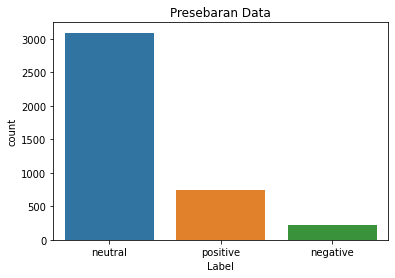

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# persebaran data
sns.countplot(pols)
plt.xlabel('Label')
plt.title('Presebaran Data')

## Train model SVM

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
data_svm = data.copy()
label_svm = pd.DataFrame(pols.copy(), columns = ['label'])

Encoder = LabelEncoder()
label_svm = Encoder.fit_transform(label_svm)

dataset_svm = pd.DataFrame(data_svm, columns = ['text'])
dataset_svm['label'] = label_svm

# Changing all text to lowercase
dataset_svm['text'] = [entry.lower() for entry in dataset_svm['text']]

# Tokenization
# each entry in the dataset corpus will be broken into set of words
dataset_svm['text'] = [word_tokenize(entry) for entry in dataset_svm['text']]

for index, entry in enumerate (dataset_svm['text']):
  Final_words = []
  for word in entry:
      Final_words.append(word)

  # The final processed set of words for each iteration will be stored in 'text_final'
  dataset_svm.loc[index, 'text_final'] = str(Final_words)

dataset_svm

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,text,label,text_final
0,"[problem, had]",1,"['problem', 'had']"
1,"[taught, use]",1,"['taught', 'use']"
2,"[use, taught]",1,"['use', 'taught']"
3,"[use, photoshop]",1,"['use', 'photoshop']"
4,"[photoshop, use]",1,"['photoshop', 'use']"
...,...,...,...
4054,"[system, starter]",1,"['system', 'starter']"
4055,"[starter, system]",1,"['starter', 'system']"
4056,"[repairservice, worst]",0,"['repairservice', 'worst']"
4057,"[repairservice, have]",1,"['repairservice', 'have']"


In [ ]:
# hapus dataset dengan sentiment neutral == '1'
dataset_svm = dataset_svm.loc[(dataset_svm["label"] != 1)]
dataset_svm

,text,label,text_final
5,"[fast, it]",2,"['fast', 'it']"
17,"[display, bright]",2,"['display', 'bright']"
18,"[brighter, much]",2,"['brighter', 'much']"
19,"[crisp, very]",2,"['crisp', 'very']"
21,"[drivei, hard]",0,"['drivei', 'hard']"
...,...,...,...
4032,"[mouse, stupid]",0,"['mouse', 'stupid']"
4035,"[problem, first]",2,"['problem', 'first']"
4040,"[sound, have]",2,"['sound', 'have']"
4049,"[operation, poor]",0,"['operation', 'poor']"


In [ ]:
from sklearn.model_selection import train_test_split

# split data set
X_train, X_test, y_train, y_test = train_test_split(dataset_svm['text_final'], dataset_svm['label'], test_size=0.3, random_state=42)

In [ ]:
# create word2vec
Tfidf_vect = TfidfVectorizer()

# vocabulary-nya harus menggunakan semua kata pada dataset, namun karena dataset test dan dev berisi data yang sama maka hanya akan digunakan data train dan dev untuk membuat vocabulary pada TD-IDF vector
Tfidf_vect.fit(dataset_svm["text_final"])

print(Tfidf_vect.vocabulary_)

# tranformasi data ke dalam bentuk representasi Tf-IDF
Train_X_Tfidf = Tfidf_vect.transform(X_train)
Test_X_Tfidf = Tfidf_vect.transform(X_test)

print("Train_X_Tfidf : \n", Train_X_Tfidf)
print("Test_X_Tfidf : \n", Test_X_Tfidf)

{'fast': 184, 'it': 281, 'display': 138, 'bright': 51, 'brighter': 52, 'much': 350, 'crisp': 108, 'very': 570, 'drivei': 149, 'hard': 229, 'computer': 89, 'new': 355, 'os': 371, 'friendly': 203, 'practice': 406, 'little': 306, 'advantage': 6, 'full': 208, 'editioni': 162, 'early': 155, 'quality': 432, 'high': 241, 'love': 315, 'windows': 590, 'pricetag': 415, 'worth': 596, 'easy': 158, 'transporting': 550, 'machine': 322, 'trackpad': 548, 'learn': 296, 'copy': 103, 'own': 376, 'awesome': 28, 'motherboard': 347, 'failed': 180, 'drive': 148, 'designflaw': 127, 'major': 328, 'slow': 483, 'boot': 46, 'proneos': 427, 'other': 372, 'color': 81, 'cool': 102, 'product': 420, 'cheap': 72, 'processor': 419, 'quick': 433, 'value': 567, 'great': 224, 'concern': 93, 'direct': 133, 'life': 299, 'whole': 586, 'lightweight': 303, 'none': 358, 'user': 566, 'average': 27, 'edge': 159, 'comfortable': 83, 'drivetwice': 152, 'ts': 553, 'nice': 356, 'service': 469, 'fridaynight': 201, 'late': 292, 'label': 

In [ ]:
# Classifier - Algorithm - SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# trainig model
SVM_Final = SVC(C=1, gamma=1, kernel='rbf')
SVM_Final.fit(Train_X_Tfidf,array(y_train))


SVC(C=1, gamma=1)

In [ ]:
# predict the labels on test dataset
predictions_SVM_Final = SVM_Final.predict(Test_X_Tfidf)

# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score on test Data -> ",accuracy_score(predictions_SVM_Final, array(y_test))*100)

SVM Accuracy Score on training Data ->  85.91065292096219


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(array(y_test), predictions_SVM_Final))

              precision    recall  f1-score   support

           0       0.98      0.52      0.68        84
           2       0.84      1.00      0.91       207

    accuracy                           0.86       291
   macro avg       0.91      0.76      0.80       291
weighted avg       0.88      0.86      0.84       291



## Train model NaiveBayesClassifier

In [ ]:
# data for NaiveBayesClassifier
data_naive = []
for i in range(len(data)):
  if pols[i] != "neutral": # data yang neutral tidak dimasukkan pada dataset training
    data_naive.append(set([data[i], pols[i]]))

print(data_naive)

# model NaiveBayesClassifier
from textblob.classifiers import NaiveBayesClassifier
# We train the NaivesBayesClassifier
cl = NaiveBayesClassifier(data_naive)

[{'fast it', 'positive'}, {'positive', 'display bright'}, {'brighter much', 'positive'}, {'crisp very', 'positive'}, {'negative', 'drivei hard'}, {'computer new', 'positive'}, {'positive', 'os friendly'}, {'negative', 'practice little'}, {'positive', 'advantage full'}, {'positive', 'os friendly'}, {'positive', 'editioni early'}, {'quality high', 'positive'}, {'positive', 'love i'}, {'positive', 'love windows'}, {'pricetag worth', 'positive'}, {'easy very', 'positive'}, {'positive', 'easy transporting'}, {'machine new', 'positive'}, {'trackpad easy', 'positive'}, {'positive', 'learn easy'}, {'positive', 'copy own'}, {'display awesome', 'positive'}, {'positive', 'awesome display'}, {'motherboard failed', 'negative'}, {'positive', 'motherboard new'}, {'motherboard failed', 'negative'}, {'positive', 'motherboard new'}, {'drive hard', 'negative'}, {'positive', 'designflaw major'}, {'machine slow', 'negative'}, {'boot slow', 'negative'}, {'proneos other', 'negative'}, {'positive', 'color coo

In [ ]:
# And then we try to classify some sample sentences.
blob = TextBlob("Good Internet. Very Slow internet. Suboptimal experience. Enjoyable performance.", classifier=cl)
for s in blob.sentences:
  print(s)
  print(s.classify())

Good Internet.
negative
Very Slow internet.
negative
Suboptimal experience.
negative
Enjoyable performance.
positive


# Lexicon based

## Read positive and negative word

In [ ]:
!wget https://raw.githubusercontent.com/shekhargulati/sentiment-analysis-python/master/opinion-lexicon-English/negative-words.txt
!wget https://raw.githubusercontent.com/shekhargulati/sentiment-analysis-python/master/opinion-lexicon-English/positive-words.txt   

--2022-11-18 15:21:15--  https://raw.githubusercontent.com/shekhargulati/sentiment-analysis-python/master/opinion-lexicon-English/negative-words.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46299 (45K) [text/plain]
Saving to: ‘negative-words.txt’

negative-words.txt  100%[===================>]  45.21K  --.-KB/s    in 0.006s  

2022-11-18 15:21:15 (7.31 MB/s) - ‘negative-words.txt’ saved [46299/46299]

--2022-11-18 15:21:15--  https://raw.githubusercontent.com/shekhargulati/sentiment-analysis-python/master/opinion-lexicon-English/positive-words.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:

In [ ]:
with open("positive-words.txt", "r") as f:
    pos = [x.rstrip("\n") for x in f.readlines()[35:]]
with open("negative-words.txt", "r",  encoding="ISO-8859-1") as f:
    neg = [x.rstrip("\n") for x in f.readlines()[35:]]

In [ ]:
pos[:10]

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation']

In [ ]:
neg[:10]

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted']

## check polarity with list of negative and positive word

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

def feature_sentiment(sentence, pos, neg):
    sent_dict = dict()
    sentence = nlp(sentence)
    opinion_words = neg + pos
    debug = 0
    for token in sentence:
        # check if the word is an opinion word, then assign sentiment
        if token.text in opinion_words:
            sentiment = 1 if token.text in pos else -1
            # if target is an adverb modifier (i.e. pretty, highly, etc.)
            # but happens to be an opinion word, ignore and pass
            if (token.dep_ == "advmod"):
                continue
            elif (token.dep_ == "amod"):
                sent_dict[token.head.text] = sentiment
            # for opinion words that are adjectives, adverbs, verbs...
            else:
                for child in token.children:
                    # if there's a adj modifier (i.e. very, pretty, etc.) add more weight to sentiment
                    # This could be better updated for modifiers that either positively or negatively emphasize
                    if ((child.dep_ == "amod") or (child.dep_ == "advmod")) and (child.text in opinion_words):
                        sentiment *= 1.5
                    # check for negation words and flip the sign of sentiment
                    if child.dep_ == "neg":
                        sentiment *= -1
                for child in token.children:
                    # if verb, check if there's a direct object
                    if (token.pos_ == "VERB") & (child.dep_ == "dobj"):                        
                        sent_dict[child.text] = sentiment
                        # check for conjugates (a AND b), then add both to dictionary
                        subchildren = []
                        conj = 0
                        for subchild in child.children:
                            if subchild.text == "and":
                                conj=1
                            if (conj == 1) and (subchild.text != "and"):
                                subchildren.append(subchild.text)
                                conj = 0
                        for subchild in subchildren:
                            sent_dict[subchild] = sentiment

                # check for negation
                for child in token.head.children:
                    noun = ""
                    if ((child.dep_ == "amod") or (child.dep_ == "advmod")) and (child.text in opinion_words):
                        sentiment *= 1.5
                    # check for negation words and flip the sign of sentiment
                    if (child.dep_ == "neg"): 
                        sentiment *= -1
                
                # check for nouns
                for child in token.head.children:
                    noun = ""
                    if (child.pos_ == "NOUN") and (child.text not in sent_dict):
                        noun = child.text
                        # Check for compound nouns
                        for subchild in child.children:
                            if subchild.dep_ == "compound":
                                noun = subchild.text + " " + noun
                        sent_dict[noun] = sentiment
                    debug += 1
    return sent_dict

In [ ]:
# example 
text = "We had some amazing food yesterday. But the next day was very boring"
print (feature_sentiment(text, pos, neg))

{'food': 1, 'day': -1}


In [ ]:
# example 
text = "it is of high quality, has a killer GUI, is extremely stable, is highly expandable, is bundled with lots of very good applications, is easy to use, and is absolutely gorgeous."
print (feature_sentiment(text, pos, neg))

{'killer': -1, 'applications': 1}


hasil extraction aspect dan opinionnya kurang tepat sehingga menghasilkan sentiment classification yang kurang baik